## Importing Libraries

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

2023-02-21 17:09:48.692830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Generate synthetic data using the Perkins-Kern-Nordgren (PKN) model

In [2]:
n = 5000
Q = np.random.uniform(10, 100, size=n)  # Injection rate (bbl/min)
mu = np.random.uniform(0.5, 2, size=n)  # Fluid viscosity (cP)
C = np.random.uniform(0.5, 3, size=n)  # Proppant concentration (lb/gal)
S = np.random.uniform(1, 30, size=n)   # Rock properties (psi)
W = 0.00125 * C * Q / mu / S          # Fracture width (in)
L = 0.089 * C**0.5 * Q**0.5 * S**0.25  # Fracture length (ft)
H = 0.36 * W                          # Fracture height (ft)

# Combine inputs and output column-wise
X = np.column_stack((Q, mu, C, S))
y = np.column_stack((L, W, H))

## Normalize data and Splitting them

In [3]:
# Normalize data
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define 5-fold cross-validation, an ANN Model and Train it

In [4]:
# Define 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Define the neural network architecture
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3))

# Compile the model
model.compile(optimizer='adam', loss='mse')

histories = []
# Train the model using cross-validation
for train_idx, val_idx in kfold.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
    histories.append(history)

2023-02-21 17:12:31.332729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
125/125 [==============================] - 2s 6ms/step - loss: 0.8663 - val_loss: 0.5696
Epoch 2/50
125/125 [==============================] - 1s 4ms/step - loss: 0.4944 - val_loss: 0.3447
Epoch 3/50
125/125 [==============================] - 1s 7ms/step - loss: 0.3507 - val_loss: 0.2489
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2719 - val_loss: 0.2052
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 0.2332 - val_loss: 0.1806
Epoch 6/50
125/125 [==============================] - 1s 4ms/step - loss: 0.2092 - val_loss: 0.1649
Epoch 7/50
125/125 [==============================] - 0s 4ms/step - loss: 0.1930 - val_loss: 0.1509
Epoch 8/50
125/125 [==============================] - 1s 8ms/step - loss: 0.1803 - val_loss: 0.1412
Epoch 9/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1682 - val_loss: 0.1363
Epoch 10/50
125/125 [==============================] - 1s 7ms/step - loss: 0.1578 - val_loss: 0.1252

125/125 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.0587
Epoch 33/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0489
Epoch 34/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0573
Epoch 35/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0492
Epoch 36/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0531
Epoch 37/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0484
Epoch 38/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0468
Epoch 39/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0448
Epoch 40/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0480
Epoch 41/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0443
Ep

125/125 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0044
Epoch 14/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 15/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0304
Epoch 16/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 17/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0042
Epoch 18/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0049
Epoch 19/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0043
Epoch 20/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0041
Epoch 21/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0055
Epoch 22/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0063
Ep

125/125 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 45/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0044
Epoch 46/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0033
Epoch 47/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0053
Epoch 48/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 49/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0035
Epoch 50/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0045


## Evaluate the model using the test set

In [5]:
y_pred = model.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(loss)
r2 = r2_score(y_test, y_pred)
print(f'Test loss (MSE): {loss:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test R^2: {r2:.4f}')

32/32 [==============================] - 0s 2ms/step
Test loss (MSE): 0.0042
Test RMSE: 0.0651
Test R^2: 0.9950


## Plots

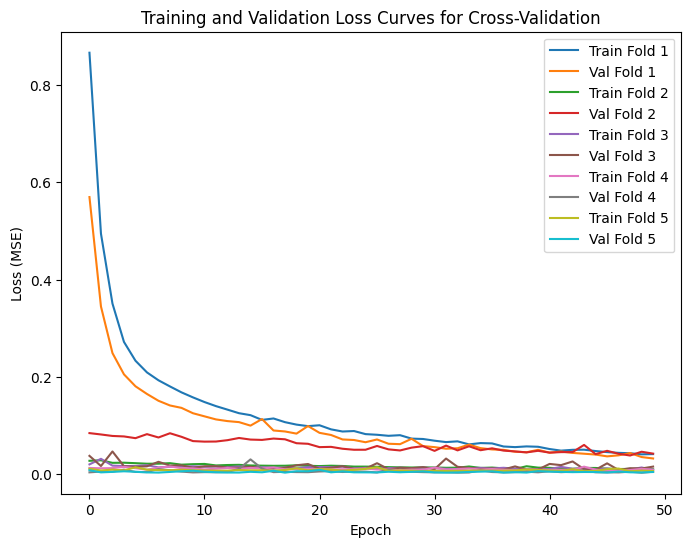

In [6]:
# Plot the training and validation loss curves for each fold
plt.figure(figsize=(8, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Curves for Cross-Validation')
plt.legend()
plt.show()

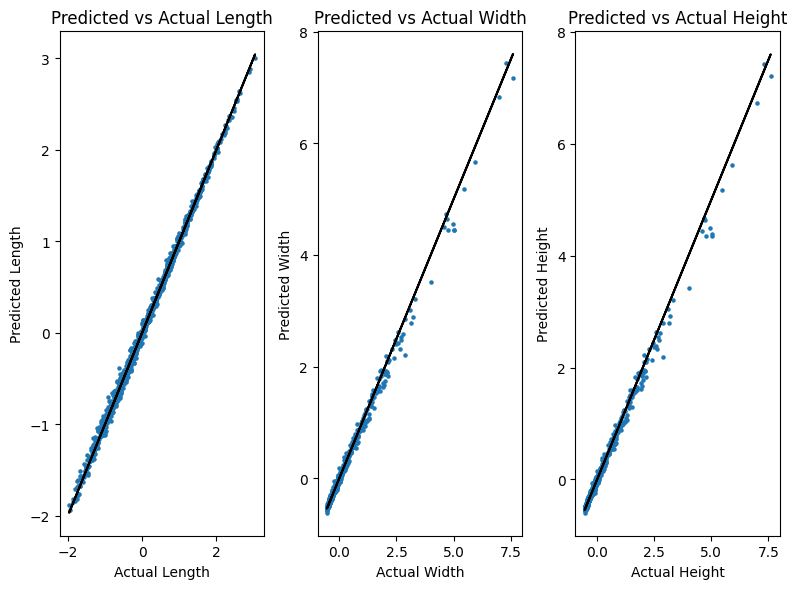

In [7]:
# Plot the predicted vs actual values for each output
plt.figure(figsize=(8, 6))
for i, col in enumerate(['Length', 'Width', 'Height']):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[:, i], y_pred[:, i], s=5)
    plt.plot(y_test[:, i], y_test[:, i], color='black')
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Predicted vs Actual {col}')
    plt.tight_layout()
plt.show()

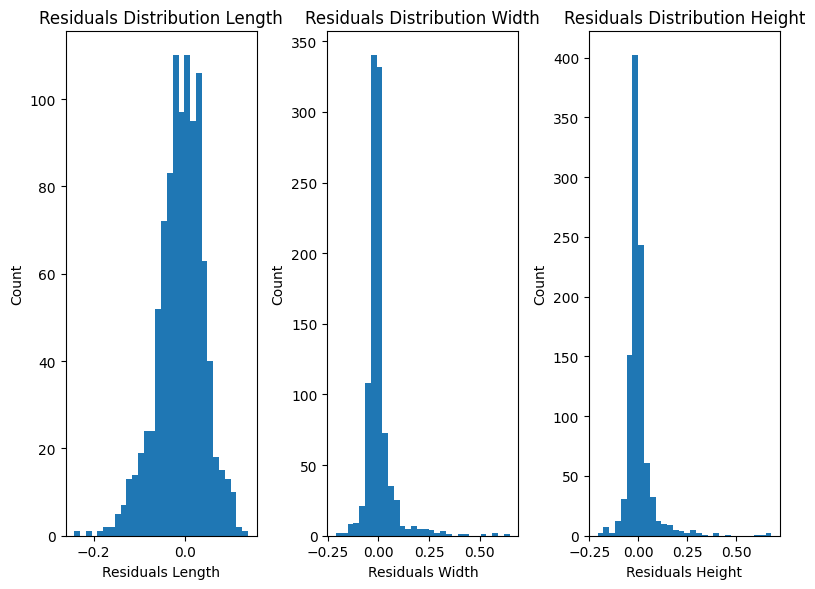

In [8]:
# Plot the distribution of residuals for each output

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
for i, col in enumerate(['Length', 'Width', 'Height']):
    plt.subplot(1, 3, i+1)
    plt.hist(residuals[:, i], bins=30)
    plt.xlabel(f'Residuals {col}')
    plt.ylabel('Count')
    plt.title(f'Residuals Distribution {col}')
    plt.tight_layout()
plt.show()